## Cat Dog Classification 

#### Very rough  neural net  I created  to classify an image  for a fun Kaggle challenge!

In [17]:
import os
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten, Dropout 
from keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
#import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.utils import shuffle

In [2]:
training_directory = './train'
testing_directory = './test'

In [3]:
training_filenames = os.listdir(training_directory)
cat_training = [x for x in training_filenames if 'cat' in x]
dog_training = [x for x in training_filenames if 'dog' in x]


In [4]:
def convert_image(name_arr, directory):
    return_arr = []
    for name in name_arr:
        temp_img = Image.open(directory + '/' + name)
        temp_img = temp_img.resize((128,128), resample=Image.BICUBIC)
        return_arr.append(np.asarray(temp_img))
    return np.asarray(return_arr, dtype=np.float16)

In [5]:
converted_cat = convert_image(cat_training, training_directory)
converted_dog = convert_image(dog_training, training_directory)

In [6]:
labels = np.zeros(25000, dtype=np.float16)
labels[12500:] = 1.0


In [7]:
shuffled_data, shuffled_labels = shuffle(np.vstack((converted_cat,converted_dog)), labels)

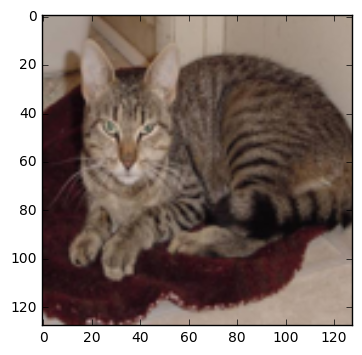

0.0


In [8]:
plt.imshow(shuffled_data[32].astype(np.uint8))
plt.show()
print(shuffled_labels[32])

In [18]:
nn = Sequential()
nn.add(Dropout(0.2,input_shape=(128,128,3)))
nn.add(Convolution2D(3,3,3, border_mode='same', activation='relu'))
nn.add(MaxPooling2D(pool_size=(2, 2), border_mode='valid'))
nn.add(Convolution2D(6,3,3, border_mode='same', activation='relu'))
nn.add(MaxPooling2D(pool_size=(2, 2), border_mode='valid'))
nn.add(Convolution2D(12,3,3, border_mode='same', activation='relu'))
nn.add(MaxPooling2D(pool_size=(2, 2), border_mode='valid'))
nn.add(Convolution2D(24,3,3, border_mode='same', activation='relu'))
nn.add(MaxPooling2D(pool_size=(2, 2), border_mode='valid'))
nn.add(Convolution2D(48,3,3, border_mode='same', activation='relu'))
nn.add(MaxPooling2D(pool_size=(2, 2), border_mode='valid'))
nn.add(Convolution2D(15,3,3, border_mode='same', activation='relu'))
nn.add(MaxPooling2D(pool_size=(2, 2), border_mode='valid'))
nn.add(Flatten())
nn.add(Dense(32, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))


sgd = SGD(lr=0.0075, decay=1e-6, momentum=0.9, nesterov=True)
rms = RMSprop(lr=0.001)
nn.compile(loss='binary_crossentropy', optimizer=rms)
nn.summary()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dropout_4 (Dropout)              (None, 128, 128, 3)   0           dropout_input_5[0][0]            
____________________________________________________________________________________________________
convolution2d_17 (Convolution2D) (None, 128, 128, 3)   84          dropout_4[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_15 (MaxPooling2D)   (None, 64, 64, 3)     0           convolution2d_17[0][0]           
____________________________________________________________________________________________________
convolution2d_18 (Convolution2D) (None, 64, 64, 6)     168         maxpooling2d_15[0][0]            
___________________________________________________________________________________________

In [19]:
saver = keras.callbacks.ModelCheckpoint("./model_weights", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
stopper = EarlyStopping(monitor='val_loss',patience=5)

with open('./model.yml', 'w') as f:
    f.write(nn.to_yaml())
    


In [20]:
history = nn.fit(shuffled_data, shuffled_labels, batch_size=32, nb_epoch=200, \
          verbose=1, callbacks=[saver, stopper], validation_split=0.25)

Train on 18750 samples, validate on 6250 samples
Epoch 1/200
18750/18750 [==============================] - 166s - loss: 0.6656 - val_loss: 0.6644
Epoch 2/200
18750/18750 [==============================] - 173s - loss: 0.6095 - val_loss: 0.6566
Epoch 3/200
18750/18750 [==============================] - 189s - loss: 0.5702 - val_loss: 0.5541
Epoch 4/200
18750/18750 [==============================] - 176s - loss: 0.5326 - val_loss: 0.5995
Epoch 5/200
18750/18750 [==============================] - 174s - loss: 0.5077 - val_loss: 0.5737
Epoch 6/200
18750/18750 [==============================] - 168s - loss: 0.4838 - val_loss: 0.4898
Epoch 7/200
18750/18750 [==============================] - 182s - loss: 0.4710 - val_loss: 0.5250
Epoch 8/200
18750/18750 [==============================] - 168s - loss: 0.4557 - val_loss: 0.5093
Epoch 9/200
18750/18750 [==============================] - 167s - loss: 0.4392 - val_loss: 0.5042
Epoch 10/200
18750/18750 [==============================] - 170s - lo

In [21]:
fitted_model = keras.models.load_model('./model_weights')

In [22]:
def random_predictions(dataset, model, number = 10 ):
    random_pics = np.random.choice(dataset.shape[0], size=number, replace=False)
    
    predict_set = [dataset[x] for x in random_pics]
    predict_set = np.asarray(predict_set)
    outputs = model.predict(predict_set)
    
    for i in range(len(predict_set)):
        score = outputs[i][0]
        if score < 0.5:
            print("I predict this is a cat with {:.2f}% confidence".format((1 - score) * 100))
        else:
            print("I predict this is a dog with {:.2f}% confidence".format(score * 100))
        plt.imshow(predict_set[i].astype(np.uint8))
        plt.show()
        

I predict this is a dog with 59.56% confidence


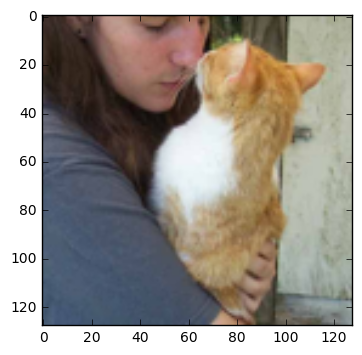

I predict this is a dog with 93.24% confidence


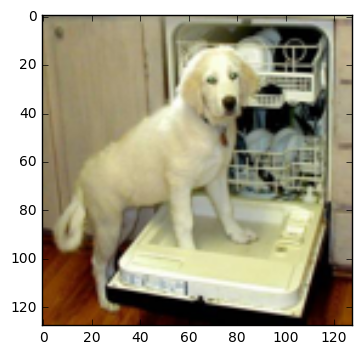

I predict this is a cat with 87.92% confidence


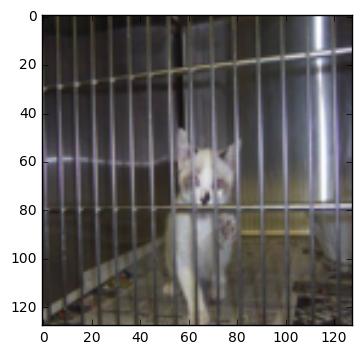

I predict this is a dog with 90.81% confidence


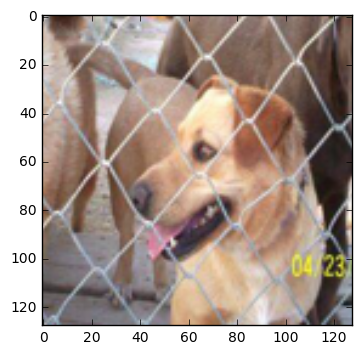

I predict this is a dog with 64.50% confidence


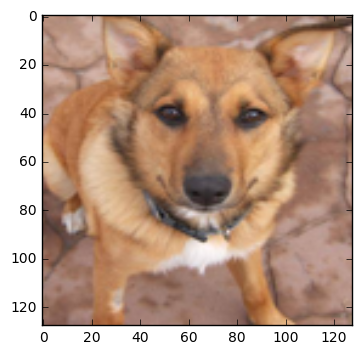

I predict this is a cat with 71.19% confidence


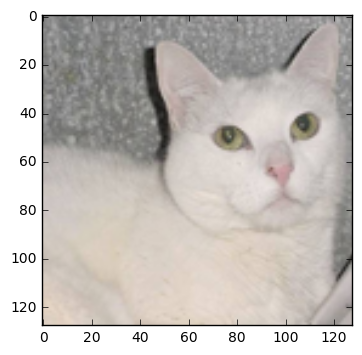

I predict this is a cat with 93.19% confidence


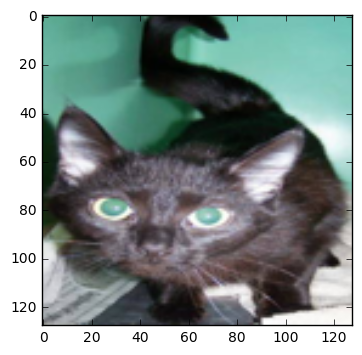

I predict this is a dog with 97.32% confidence


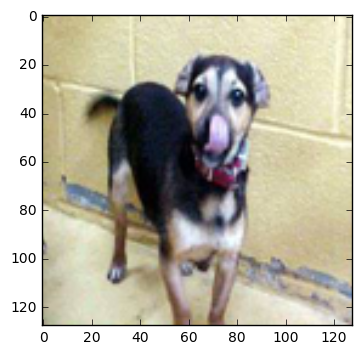

I predict this is a dog with 59.64% confidence


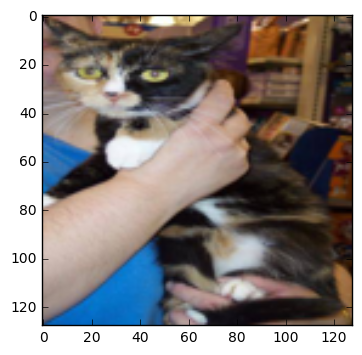

I predict this is a dog with 69.51% confidence


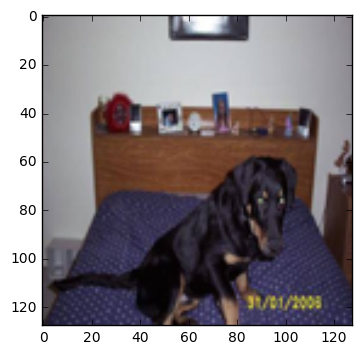

In [23]:
random_predictions(shuffled_data, fitted_model, number=10)

In [24]:
converted_test_data = convert_image(os.listdir(testing_directory), testing_directory)

kaggle_preds = fitted_model.predict(converted_test_data)

I predict this is a dog with 56.08% confidence


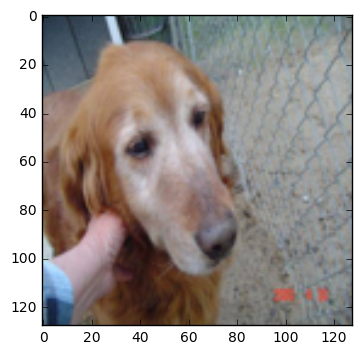

I predict this is a dog with 83.00% confidence


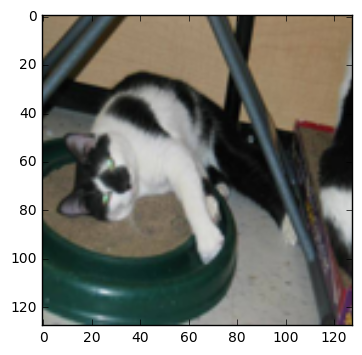

I predict this is a cat with 52.42% confidence


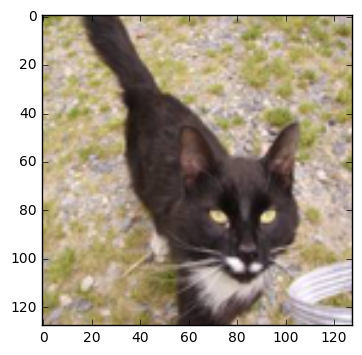

I predict this is a cat with 59.29% confidence


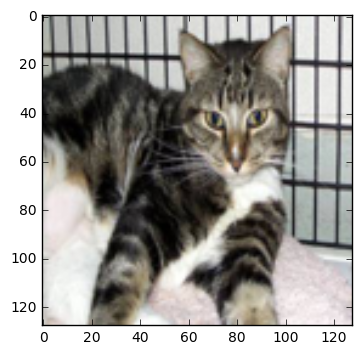

I predict this is a cat with 64.74% confidence


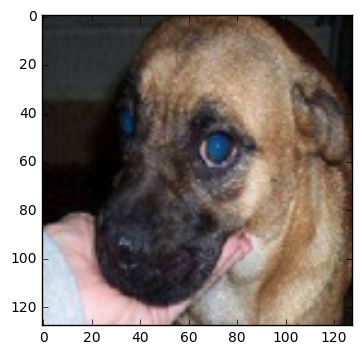

I predict this is a cat with 88.81% confidence


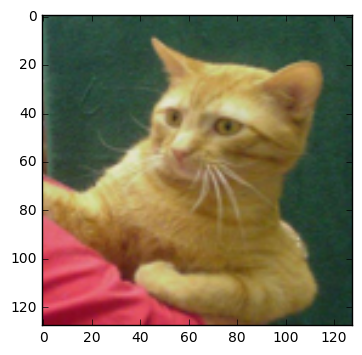

I predict this is a dog with 61.85% confidence


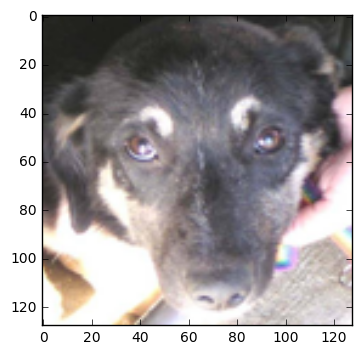

I predict this is a cat with 95.29% confidence


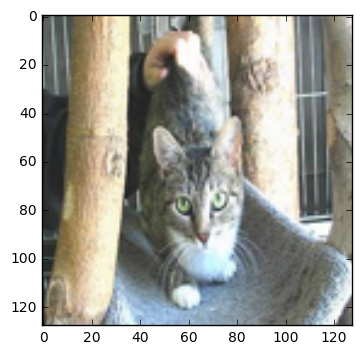

I predict this is a cat with 59.94% confidence


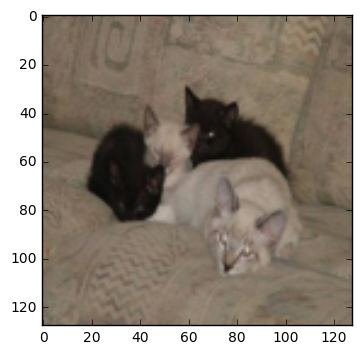

I predict this is a cat with 92.80% confidence


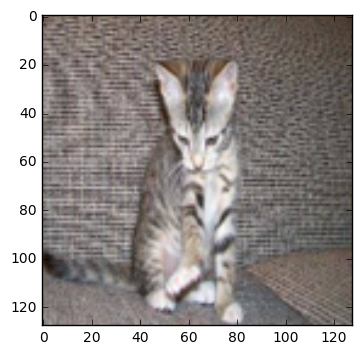

In [25]:
show_results = np.random.choice(kaggle_preds.shape[0], size=10, replace=False)

for x in show_results:
    score = kaggle_preds[x][0]
    if score < 0.5:
        print("I predict this is a cat with {:.2f}% confidence".format((1 - score) * 100))
    else:
        print("I predict this is a dog with {:.2f}% confidence".format(score * 100))
    plt.imshow(converted_test_data[x].astype(np.uint8))
    plt.show()

In [26]:
with open('predictions.csv', 'w') as f:
    f.write('id,label\n')
    i = 1
    for x in kaggle_preds:
        f.write('{},{}\n'.format(i, x[0] ))
        i += 1

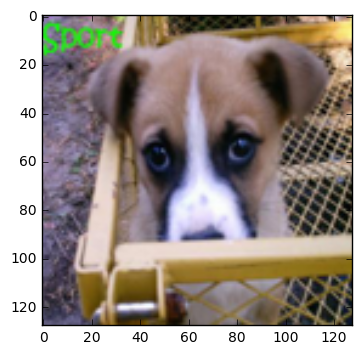

In [30]:
plt.imshow(converted_test_data[16].astype(np.uint8))
plt.show()